In [1]:
import pandas as pd

df = pd.read_csv('/root/QuantAndCo/Data/Backtest/Combined_EURUSD_GBPUSD.csv')
df.set_index("timestamp", inplace=True)
df.index = pd.to_datetime(df.index)

def Spread_PairsTrading(df, asset_x, asset_y, window):
    df["spread"] = df[asset_y] - df[asset_x]
    df["spread_moving_avg"] = df["spread"].rolling(window=window, closed='left').mean()
    df["spread_moving_std"] = df["spread"].rolling(window=window, closed='left').std()
    return df

df = Spread_PairsTrading(df, asset_x='GBP_USD', asset_y='EUR_USD', window=33_000)



In [68]:
df.iloc[0:33001]['spread'].mean()

-0.10745746242424244

In [70]:
df.iloc[32998:]

,GBP_USD,EUR_USD,spread,spread_moving_avg,spread_moving_std
timestamp,,,,,
2019-09-03 01:01:00+00:00,1.20567,1.09522,-0.11045,NaN,NaN
2019-09-03 01:02:00+00:00,1.20538,1.09458,-0.11080,NaN,NaN
2019-09-03 01:03:00+00:00,1.20524,1.09449,-0.11075,-0.107458,0.013217
2019-09-03 01:04:00+00:00,1.20486,1.09422,-0.11064,-0.107457,0.013217
2019-09-03 01:05:00+00:00,1.20498,1.09448,-0.11050,-0.107457,0.013216
...,...,...,...,...,...
2024-04-19 14:07:00+00:00,1.24638,1.06681,-0.17957,-0.181358,0.002108
2024-04-19 14:08:00+00:00,1.24650,1.06688,-0.17962,-0.181358,0.002108
2024-04-19 14:09:00+00:00,1.24670,1.06704,-0.17966,-0.181358,0.002108


In [73]:
df.iloc[:100]

,GBP_USD,EUR_USD,spread,spread_moving_avg,spread_moving_std
timestamp,,,,,
2019-07-19 11:31:00+00:00,1.25362,1.12381,-0.12981,NaN,NaN
2019-07-19 11:32:00+00:00,1.25352,1.12378,-0.12974,NaN,NaN
2019-07-19 11:33:00+00:00,1.25324,1.12358,-0.12966,NaN,NaN
2019-07-19 11:34:00+00:00,1.25327,1.12358,-0.12969,NaN,NaN
2019-07-19 11:35:00+00:00,1.25324,1.12355,-0.12969,NaN,NaN
...,...,...,...,...,...
2019-07-19 13:07:00+00:00,1.25158,1.12254,-0.12904,NaN,NaN
2019-07-19 13:08:00+00:00,1.25151,1.12243,-0.12908,NaN,NaN
2019-07-19 13:09:00+00:00,1.25148,1.12240,-0.12908,NaN,NaN


<Axes: xlabel='timestamp'>

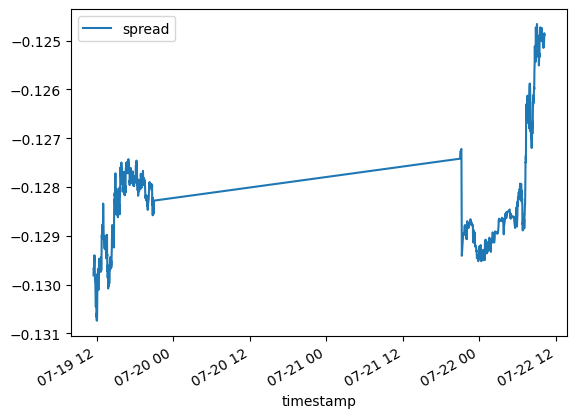

In [75]:
df.iloc[:1000][["spread"]].plot()

<Axes: xlabel='timestamp'>

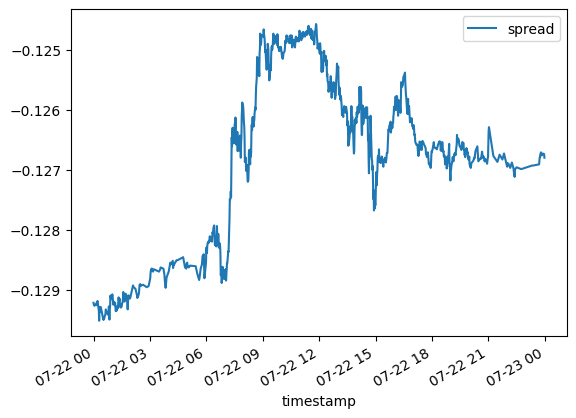

In [78]:
df.loc[(df.index>='2019-07-22 00:00') & (df.index<='2019-07-22 23:59')][["spread"]].plot()

<Axes: xlabel='timestamp'>

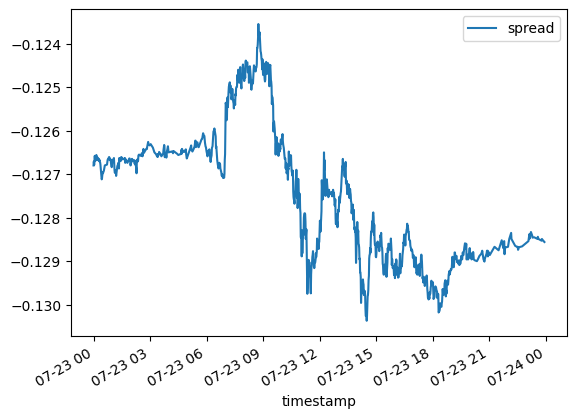

In [79]:
df.loc[(df.index>='2019-07-23 00:00') & (df.index<='2019-07-23 23:59')][["spread"]].plot()

<Axes: xlabel='timestamp'>

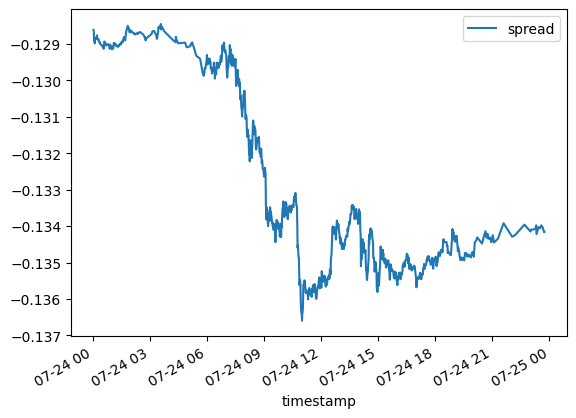

In [80]:
df.loc[(df.index>='2019-07-24 00:00') & (df.index<='2019-07-24 23:59')][["spread"]].plot()

<Axes: xlabel='timestamp'>

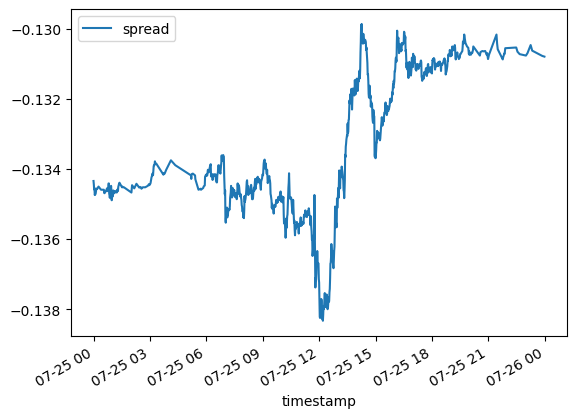

In [81]:
df.loc[(df.index>='2019-07-25 00:00') & (df.index<='2019-07-25 23:59')][["spread"]].plot()

In [5]:
import datetime
import random

def generate_random_date(start_date, end_date):
    """Generate a random date between start_date and end_date."""
    delta = end_date - start_date
    random_days = random.randrange(delta.days + 1)
    return start_date + datetime.timedelta(days=random_days)

def is_date_available(date, dataset):
    """Check if the given date is available in the dataset."""
    # This function needs to be adapted based on how the dataset is structured and how dates are stored.
    return date in dataset.date

def find_available_date(start_date, end_date, dataset, max_attempts=10):
    """Find a random date that is available in the dataset, retrying until one is found."""
    random_date = generate_random_date(start_date, end_date)
    attempts=0
    while attempts <= max_attempts:
        random_date = generate_random_date(start_date, end_date)
        if is_date_available(random_date, dataset):
            return random_date
        attempts+=1


# Example usage:
# Uncomment the following lines when running the code outside this environment.

# start = datetime.date(2020, 1, 1)
# end = datetime.date(2020, 12, 31)
# sample_dataset = {datetime.date(2020, 1, 10), datetime.date(2020, 2, 20)}
# available_date = find_available_date(start, end, sample_dataset)
# print(available_date)


df['date'] = df.index.normalize().date
start, end = df.date[0], df.date[-1]
find_available_date(start, end, df)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [88]:
df.index

DatetimeIndex(['2019-07-19 11:31:00+00:00', '2019-07-19 11:32:00+00:00',
               '2019-07-19 11:33:00+00:00', '2019-07-19 11:34:00+00:00',
               '2019-07-19 11:35:00+00:00', '2019-07-19 11:36:00+00:00',
               '2019-07-19 11:37:00+00:00', '2019-07-19 11:38:00+00:00',
               '2019-07-19 11:39:00+00:00', '2019-07-19 11:40:00+00:00',
               ...
               '2024-04-19 14:02:00+00:00', '2024-04-19 14:03:00+00:00',
               '2024-04-19 14:04:00+00:00', '2024-04-19 14:05:00+00:00',
               '2024-04-19 14:06:00+00:00', '2024-04-19 14:07:00+00:00',
               '2024-04-19 14:08:00+00:00', '2024-04-19 14:09:00+00:00',
               '2024-04-19 14:10:00+00:00', '2024-04-19 14:11:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=1613528, freq=None)

In [89]:
df['date'] = df.index.normalize().date


In [90]:
df

,GBP_USD,EUR_USD,spread,spread_moving_avg,spread_moving_std,date
timestamp,,,,,,
2019-07-19 11:31:00+00:00,1.25362,1.12381,-0.12981,NaN,NaN,2019-07-19
2019-07-19 11:32:00+00:00,1.25352,1.12378,-0.12974,NaN,NaN,2019-07-19
2019-07-19 11:33:00+00:00,1.25324,1.12358,-0.12966,NaN,NaN,2019-07-19
2019-07-19 11:34:00+00:00,1.25327,1.12358,-0.12969,NaN,NaN,2019-07-19
2019-07-19 11:35:00+00:00,1.25324,1.12355,-0.12969,NaN,NaN,2019-07-19
...,...,...,...,...,...,...
2024-04-19 14:07:00+00:00,1.24638,1.06681,-0.17957,-0.181358,0.002108,2024-04-19
2024-04-19 14:08:00+00:00,1.24650,1.06688,-0.17962,-0.181358,0.002108,2024-04-19
2024-04-19 14:09:00+00:00,1.24670,1.06704,-0.17966,-0.181358,0.002108,2024-04-19


<Axes: >

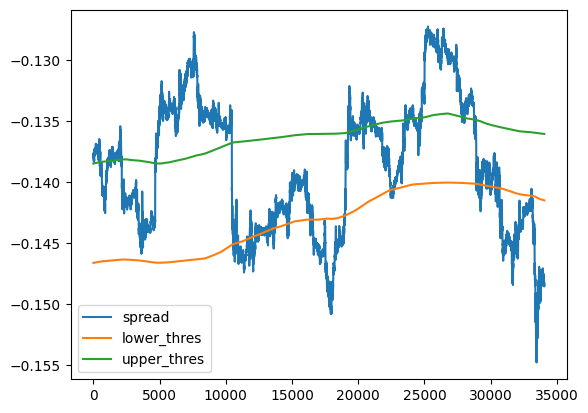

In [53]:
df["upper_thres"] = df["spread_moving_avg"] + 0.5 * df["spread_moving_std"]
df['lower_thres'] = df["spread_moving_avg"] - 0.5 * df["spread_moving_std"]

df[["spread", "lower_thres", "upper_thres"]].plot()

<Axes: >

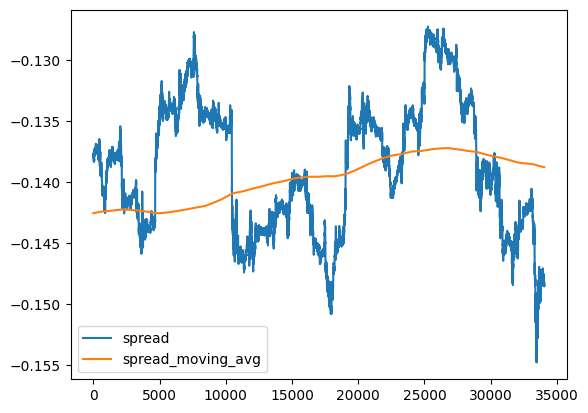

In [54]:
df[['spread', 'spread_moving_avg']].plot()

In [52]:
df = pd.read_csv('/root/QuantAndCo/Data/Backtest-test.csv')
df

,timestamp,GBP_USD,EUR_USD,spread,spread_moving_avg,spread_moving_std,signal,hedge_ratio,position_EUR_USD,position_GBP_USD,return_GBP_USD,return_EUR_USD,net_position_change,portfolio_change,Wealth,fees
0,2023-02-10 00:00:00+00:00,1.21152,1.07385,-0.13767,-0.142536,0.008148,0.0,1.0,0.0,-0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN
1,2023-02-10 00:01:00+00:00,1.21130,1.07366,-0.13764,-0.142536,0.008148,-1.0,1.0,-1.0,1.0,-0.000182,-0.000177,2.0,-0.000005,10000.000000,NaN
2,2023-02-10 00:02:00+00:00,1.21124,1.07360,-0.13764,-0.142536,0.008148,-1.0,1.0,-1.0,1.0,-0.000050,-0.000056,0.0,0.000006,9998.553434,1.4
3,2023-02-10 00:03:00+00:00,1.21116,1.07351,-0.13765,-0.142535,0.008148,-1.0,1.0,-1.0,1.0,-0.000066,-0.000084,0.0,0.000018,9998.616925,0.0
4,2023-02-10 00:04:00+00:00,1.21117,1.07356,-0.13761,-0.142535,0.008148,-1.0,1.0,-1.0,1.0,0.000008,0.000047,0.0,-0.000038,9998.794722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34043,2023-03-15 23:56:00+00:00,1.20690,1.05843,-0.14847,-0.138757,0.005452,1.0,1.0,1.0,-1.0,-0.000017,-0.000047,0.0,-0.000031,9618.910969,0.0
34044,2023-03-15 23:57:00+00:00,1.20680,1.05826,-0.14854,-0.138757,0.005453,1.0,1.0,1.0,-1.0,-0.000083,-0.000161,0.0,-0.000078,9618.615991,0.0
34045,2023-03-15 23:58:00+00:00,1.20679,1.05826,-0.14853,-0.138757,0.005453,1.0,1.0,1.0,-1.0,-0.000008,0.000000,0.0,0.000008,9617.868064,0.0
34046,2023-03-15 23:59:00+00:00,1.20670,1.05817,-0.14853,-0.138758,0.005453,1.0,1.0,1.0,-1.0,-0.000075,-0.000085,0.0,-0.000010,9617.947761,0.0


In [44]:
-0.14734	 >= -0.157153 + 0.5 * 0.019671

False

In [43]:
df["signal"] = (df["spread"] <= df["spread_moving_avg"] - 0.5 * df["spread_moving_std"]) * 1 + (df["spread"] >= df["spread_moving_avg"] + 0.5 * df["spread_moving_std"]) * -1

-0.1473175

In [46]:
-0.14738 >= -0.157153 +0.5 * 0.019671


False

In [38]:
df["signal_change"] = df["signal"].diff()
df.loc[df.signal_change!=0]

,timestamp,GBP_USD,EUR_USD,spread,spread_moving_avg,spread_moving_std,signal,hedge_ratio,position_EUR_USD,position_GBP_USD,return_GBP_USD,return_EUR_USD,net_position_change,portfolio_change,Wealth,fees,signal_change
0,2023-02-10 00:00:00+00:00,1.21152,1.07385,-0.13767,-0.159681,0.019624,0.0,1.0,0.0,-0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN
1,2023-02-10 00:01:00+00:00,1.21130,1.07366,-0.13764,-0.159681,0.019624,-1.0,1.0,-1.0,1.0,-0.000182,-0.000177,2.0,-0.000005,10000.000000,NaN,-1.0
17532,2023-02-28 09:07:00+00:00,1.20920,1.06182,-0.14738,-0.157153,0.019671,0.0,1.0,0.0,-0.0,-0.000074,-0.000104,2.0,0.000000,10092.363689,0.000000,1.0
17534,2023-02-28 09:09:00+00:00,1.20916,1.06182,-0.14734,-0.157153,0.019671,-1.0,1.0,-1.0,1.0,0.000182,0.000132,2.0,0.000050,10090.950758,0.000000,-1.0
17535,2023-02-28 09:10:00+00:00,1.20942,1.06206,-0.14736,-0.157153,0.019671,0.0,1.0,0.0,-0.0,0.000215,0.000226,2.0,0.000000,10090.043694,1.412733,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31997,2023-03-14 12:52:00+00:00,1.21893,1.07332,-0.14561,-0.155248,0.019960,0.0,1.0,0.0,-0.0,0.000501,0.000289,2.0,0.000000,10041.693246,0.000000,1.0
32070,2023-03-14 14:05:00+00:00,1.21644,1.07145,-0.14499,-0.155237,0.019954,-1.0,1.0,-1.0,1.0,-0.000033,0.000028,2.0,-0.000061,10040.287409,0.000000,-1.0
33296,2023-03-15 10:57:00+00:00,1.20689,1.06258,-0.14431,-0.155028,0.019862,0.0,1.0,0.0,-0.0,-0.000513,0.000169,2.0,0.000000,10049.414894,0.000000,1.0
33297,2023-03-15 10:58:00+00:00,1.20701,1.06276,-0.14425,-0.155028,0.019862,-1.0,1.0,-1.0,1.0,0.000099,0.000169,2.0,-0.000070,10048.007976,1.406918,-1.0


In [40]:
df.loc[df.signal == -1]

,timestamp,GBP_USD,EUR_USD,spread,spread_moving_avg,spread_moving_std,signal,hedge_ratio,position_EUR_USD,position_GBP_USD,return_GBP_USD,return_EUR_USD,net_position_change,portfolio_change,Wealth,fees,signal_change
1,2023-02-10 00:01:00+00:00,1.21130,1.07366,-0.13764,-0.159681,0.019624,-1.0,1.0,-1.0,1.0,-0.000182,-0.000177,2.0,-0.000005,10000.000000,NaN,-1.0
2,2023-02-10 00:02:00+00:00,1.21124,1.07360,-0.13764,-0.159681,0.019624,-1.0,1.0,-1.0,1.0,-0.000050,-0.000056,0.0,0.000006,9998.553434,1.4,0.0
3,2023-02-10 00:03:00+00:00,1.21116,1.07351,-0.13765,-0.159681,0.019624,-1.0,1.0,-1.0,1.0,-0.000066,-0.000084,0.0,0.000018,9998.616925,0.0,0.0
4,2023-02-10 00:04:00+00:00,1.21117,1.07356,-0.13761,-0.159680,0.019624,-1.0,1.0,-1.0,1.0,0.000008,0.000047,0.0,-0.000038,9998.794722,0.0,0.0
5,2023-02-10 00:05:00+00:00,1.21124,1.07356,-0.13768,-0.159680,0.019624,-1.0,1.0,-1.0,1.0,0.000058,0.000000,0.0,0.000058,9998.411571,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33306,2023-03-15 11:07:00+00:00,1.20638,1.06170,-0.14468,-0.155026,0.019861,-1.0,1.0,-1.0,1.0,-0.000182,-0.000075,0.0,-0.000107,10051.750831,0.0,0.0
33307,2023-03-15 11:08:00+00:00,1.20618,1.06160,-0.14458,-0.155026,0.019861,-1.0,1.0,-1.0,1.0,-0.000166,-0.000094,0.0,-0.000072,10050.675441,0.0,0.0
33308,2023-03-15 11:09:00+00:00,1.20670,1.06206,-0.14464,-0.155026,0.019861,-1.0,1.0,-1.0,1.0,0.000431,0.000433,0.0,-0.000002,10049.955847,0.0,0.0
33309,2023-03-15 11:10:00+00:00,1.20634,1.06152,-0.14482,-0.155026,0.019861,-1.0,1.0,-1.0,1.0,-0.000298,-0.000508,0.0,0.000210,10049.933786,0.0,0.0


In [34]:
-0.15-0.5*0.25

-0.275

In [35]:
df["MA-0.5Std"] = df["spread_moving_avg"] - 0.5 * df["spread_moving_std"]

<Axes: >

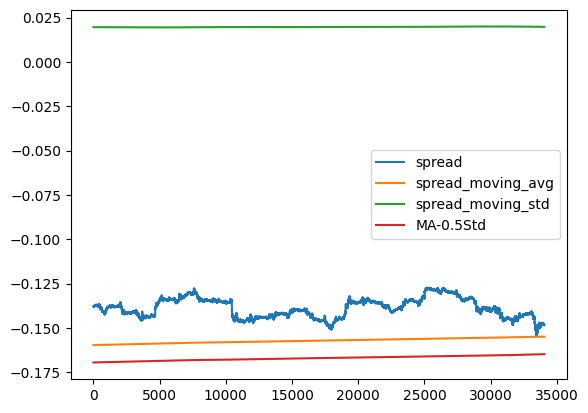

In [36]:
df[["spread", "spread_moving_avg", "spread_moving_std", "MA-0.5Std"]].plot()

In [12]:
import pandas as pd

df = pd.read_csv('/root/QuantAndCo/Data/Backtest/Optimization/Pairs_trading_EUR_USD_optimization_20222024_spread_signals.csv')


In [13]:
df

,Combination #,start_date,end_date,window,long_thres,short_thres,leverage,performance
0,1,2023-08-08,2023-09-27,10000,-2.0,0.0,1,-0.049344
1,1,2022-01-12,2022-03-07,10000,-2.0,0.0,1,-0.052745
2,1,2022-04-29,2022-06-20,10000,-2.0,0.0,1,-0.052563
3,1,2022-11-17,2023-01-09,10000,-2.0,0.0,1,-0.040028
4,1,2024-01-18,2024-03-07,10000,-2.0,0.0,1,-0.060207
...,...,...,...,...,...,...,...,...
11645,125,2024-02-28,2024-04-18,500000,0.0,2.0,1,0.001084
11646,125,2023-01-04,2023-02-22,500000,0.0,2.0,1,-0.001039
11647,125,2022-03-14,2022-05-03,500000,0.0,2.0,1,-0.000279
11648,125,2022-09-01,2022-10-20,500000,0.0,2.0,1,-0.008442


<Axes: xlabel='timestamp'>

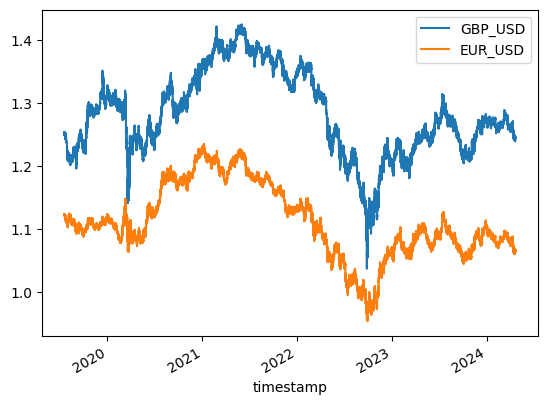

In [3]:
df[["GBP_USD", "EUR_USD"]].plot()

<Axes: xlabel='timestamp'>

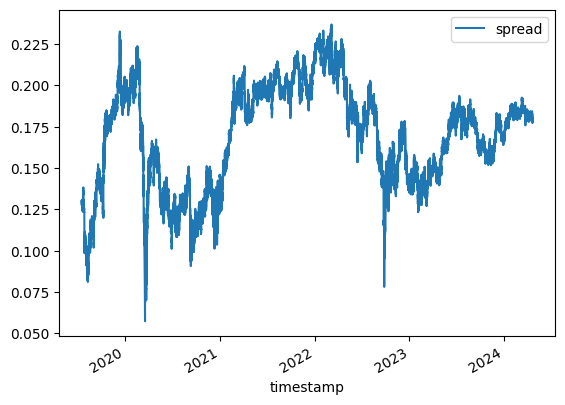

In [4]:
df["spread"] = df["GBP_USD"] - df["EUR_USD"]

df[["spread"]].plot()

In [5]:
df["spread_moving_avg"] = df["spread"].rolling(50000).mean()

<Axes: xlabel='timestamp'>

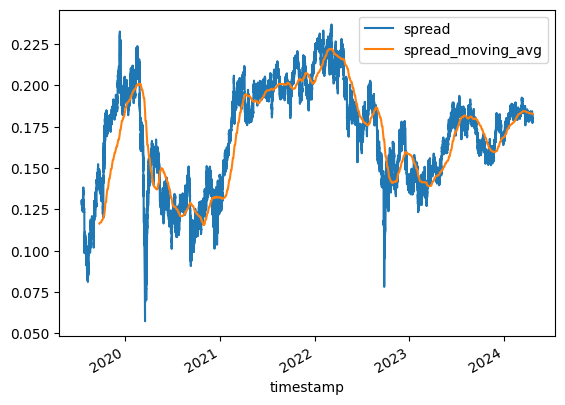

In [6]:
df[["spread", "spread_moving_avg"]].plot()

In [8]:
df["spread_moving_std"] = df["spread"].rolling(window=50000).std()

In [9]:
df["signal"] = (df["spread"] <= df["spread_moving_avg"] - 0.5 * df["spread_moving_std"]) * 1

In [10]:
df["signal"]

timestamp
2019-07-19 11:31:00+00:00    0
2019-07-19 11:32:00+00:00    0
2019-07-19 11:33:00+00:00    0
2019-07-19 11:34:00+00:00    0
2019-07-19 11:35:00+00:00    0
                            ..
2024-04-19 14:07:00+00:00    1
2024-04-19 14:08:00+00:00    1
2024-04-19 14:09:00+00:00    1
2024-04-19 14:10:00+00:00    1
2024-04-19 14:11:00+00:00    1
Name: signal, Length: 1613528, dtype: int64

In [12]:
df = pd.read_csv('/root/QuantAndCo/Data/Backtest-test.csv')
df = df[["GBP_USD", "EUR_USD", "hedge_ratio", "z_score", "signal", "position_EUR_USD", "position_GBP_USD", "return_EUR_USD", "return_GBP_USD", "net_position_change", "transaction_costs", "portfolio_change", "net_portfolio_change", "Wealth"]]

In [14]:
(-0.000904 + 1) * 10_000

9990.96

In [13]:
df

,GBP_USD,EUR_USD,hedge_ratio,z_score,signal,position_EUR_USD,position_GBP_USD,return_EUR_USD,return_GBP_USD,net_position_change,transaction_costs,portfolio_change,net_portfolio_change,Wealth
0,1.30925,1.10902,0.829187,2.026357,0.0,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,10000.000000
1,1.30966,1.10950,0.829158,2.048311,-1.0,-3.0,2.487474,0.000433,0.000313,5.487474,3.841232e-04,-0.000519,-0.000904,9990.964015
2,1.30983,1.10974,0.829130,2.063792,-1.0,-3.0,2.487389,0.000216,0.000130,0.000085,5.923773e-09,-0.000326,-0.000326,9987.706241
3,1.30966,1.10952,0.829101,2.051142,-1.0,-3.0,2.487304,-0.000198,-0.000130,0.000085,5.980267e-09,0.000272,0.000272,9990.421959
4,1.30978,1.10958,0.829073,2.044745,-1.0,-3.0,2.487218,0.000054,0.000092,0.000086,6.044117e-09,0.000066,0.000066,9991.077906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50111,1.23449,1.04724,0.590231,-0.116199,0.0,0.0,-0.000000,0.000000,0.000041,0.000000,0.000000e+00,0.000000,0.000000,9522.996199
50112,1.23452,1.04729,0.590220,-0.111682,0.0,0.0,-0.000000,0.000048,0.000024,0.000000,0.000000e+00,0.000000,0.000000,9522.996199
50113,1.23430,1.04722,0.590209,-0.103337,0.0,0.0,-0.000000,-0.000067,-0.000178,0.000000,0.000000e+00,0.000000,0.000000,9522.996199
50114,1.23440,1.04730,0.590198,-0.100392,0.0,0.0,-0.000000,0.000076,0.000081,0.000000,0.000000e+00,0.000000,0.000000,9522.996199


In [6]:
df["signal_change"] = df.signal.diff()

In [7]:
df.loc[df.signal_change!=0]

,GBP_USD,EUR_USD,hedge_ratio,z_score,signal,position_EUR_USD,position_GBP_USD,return_EUR_USD,return_GBP_USD,net_position_change,transaction_costs,portfolio_change,net_portfolio_change,Wealth,signal_change
0,1.30925,1.10902,0.829187,2.026357,0.0,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,NaN
1,1.30966,1.10950,0.829158,2.048311,-1.0,-10.0,8.291580,0.000433,0.000313,18.291580,0.001280,-0.001732,-0.003012,9999.996988,-1.0
3336,1.31282,1.10458,0.749318,0.530300,0.0,0.0,-0.000000,0.000281,0.000061,17.493376,0.001225,0.000000,-0.001225,10000.062420,1.0
3337,1.31294,1.10457,0.749297,0.515534,-1.0,-10.0,7.492973,-0.000009,0.000091,17.492973,0.001225,0.000775,-0.000449,10000.061971,-1.0
3457,1.31426,1.10536,0.746830,0.484309,0.0,0.0,-0.000000,-0.000054,0.000015,17.468494,0.001223,-0.000000,-0.001223,10000.060452,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47935,1.24621,1.05176,0.601387,-0.510747,0.0,0.0,-0.000000,-0.000456,-0.000529,16.013867,0.001121,0.000000,-0.001121,9999.760801,-1.0
47936,1.24636,1.05144,0.601387,-0.565985,1.0,10.0,-6.013868,-0.000304,0.000120,16.013868,0.001121,-0.003766,-0.004887,9999.755914,1.0
47966,1.24609,1.05175,0.601415,-0.501376,0.0,0.0,-0.000000,-0.000029,0.000024,16.014139,0.001121,-0.000000,-0.001121,9999.759474,-1.0
47967,1.24662,1.05220,0.601416,-0.483665,1.0,10.0,-6.014156,0.000428,0.000425,16.014156,0.001121,0.001721,0.000600,9999.760074,1.0


In [2]:
df = pd.read_csv('/root/QuantAndCo/Data/Backtest/Optimization/Pairs_trading_EUR_USD_Optimal_Backtest.csv')


In [3]:
df

,timestamp,GBP_USD,EUR_USD,hedge_ratio,intercept,y_hat,residuals,resid_mean,resid_std,z_score,signal,position,position_change,EUR_USD_return,GBP_USD_return,Portfolio_return,Wealth,fees
0,2019-07-19 11:31:00+00:00,1.25362,1.12381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,10000.000000,NaN
1,2019-07-19 11:32:00+00:00,1.25352,1.12378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.000027,-0.000080,NaN,NaN,0.0
2,2019-07-19 11:33:00+00:00,1.25324,1.12358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.000178,-0.000223,NaN,NaN,0.0
3,2019-07-19 11:34:00+00:00,1.25327,1.12358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.000000,0.000024,NaN,NaN,0.0
4,2019-07-19 11:35:00+00:00,1.25324,1.12355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.000027,-0.000024,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332736,2020-08-31 23:55:00+00:00,1.33635,1.19366,-0.088617,1.312241,1.193817,-0.000157,0.000218,0.000211,-1.777695,1,1.0,0.0,-0.000017,0.000022,-0.000015,80456.407837,0.0
332737,2020-08-31 23:57:00+00:00,1.33642,1.19382,-0.072406,1.290575,1.193809,0.000011,0.000215,0.000212,-0.965687,1,1.0,0.0,0.000134,0.000052,0.000138,80452.843904,0.0
332738,2020-08-31 23:58:00+00:00,1.33642,1.19379,-0.060432,1.274573,1.193810,-0.000020,0.000216,0.000212,-1.114266,1,1.0,0.0,-0.000025,0.000000,-0.000025,80486.111383,0.0
332739,2020-08-31 23:59:00+00:00,1.33636,1.19368,-0.006606,1.202636,1.193808,-0.000128,0.000216,0.000212,-1.621538,1,1.0,0.0,-0.000092,-0.000045,-0.000092,80480.043676,0.0


<Axes: >

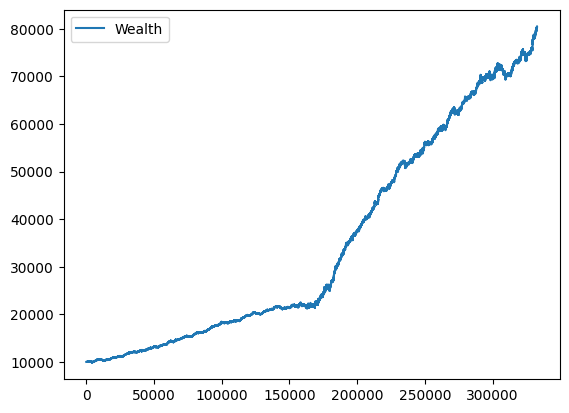

In [21]:
df[["Wealth"]].plot()

<Axes: >

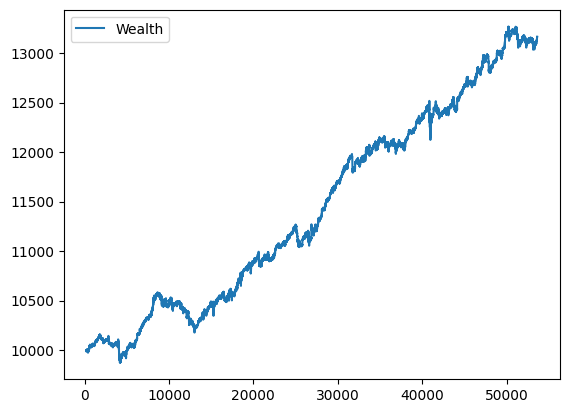

In [19]:
df_ = df.loc[df.timestamp<='2019-10-01'].dropna()
df_[["Wealth"]].plot()

<Axes: >

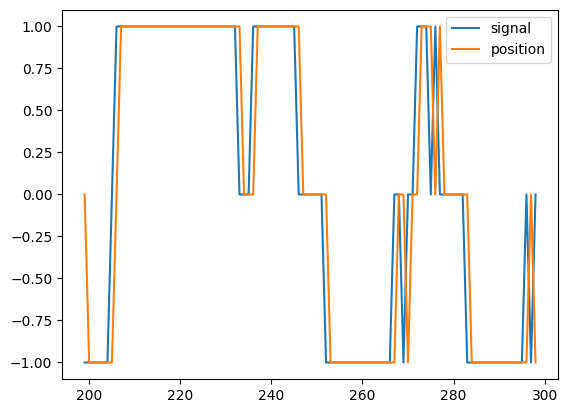

In [22]:
df_.iloc[:100][["signal", "position"]].plot()

In [6]:
import pandas as pd
df = pd.read_csv('/root/QuantAndCo/Data/Backtest/Optimization/Pairs_trading_EUR_USD_Optimal_Backtest_4.csv')

In [10]:
df[["Wealth"]].dropna().describe()

,Wealth
count,420928.000000
mean,9990.312128
std,5.801886
min,9980.014451
25%,9985.154410
50%,9990.662967
75%,9995.405012
max,10000.000000


In [12]:
df.dropna()

,timestamp,GBP_USD,EUR_USD,hedge_ratio,intercept,y_hat,residuals,resid_mean,resid_std,z_score,signal,position_EUR_USD,position_GBP_USD,return_GBP_USD,return_EUR_USD,portfolio_change,position_change,transaction_costs,net_portfolio_change,Wealth
199,2019-07-19 14:51:00+00:00,1.25066,1.12248,0.470201,0.534090,1.122151,0.000329,0.000191,0.000138,0.999992,0.0,0.0,-0.000000,0.000032,-0.000018,-0.000000,0.000000,0.000000,-0.000000,10000.000000
200,2019-07-19 14:52:00+00:00,1.25066,1.12251,0.458694,0.548502,1.122173,0.000337,0.000193,0.000138,1.040565,-1.0,-3.0,1.376083,0.000000,0.000027,-0.000080,4.376083,0.000306,-0.000387,9999.999613
201,2019-07-19 14:53:00+00:00,1.25086,1.12262,0.447520,0.562499,1.122284,0.000336,0.000194,0.000139,1.019468,-1.0,-3.0,1.342560,0.000160,0.000098,-0.000079,0.033523,0.000002,-0.000082,9999.999532
202,2019-07-19 14:54:00+00:00,1.25108,1.12276,0.438795,0.573428,1.122396,0.000364,0.000196,0.000140,1.200251,-1.0,-3.0,1.316384,0.000176,0.000125,-0.000143,0.026176,0.000002,-0.000144,9999.999387
203,2019-07-19 14:55:00+00:00,1.25060,1.12266,0.430755,0.583500,1.122202,0.000458,0.000201,0.000141,1.822344,-1.0,-3.0,1.292264,-0.000384,-0.000089,-0.000229,0.024121,0.000002,-0.000230,9999.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421023,2020-12-02 01:50:00+00:00,1.34106,1.20674,0.182897,0.961195,1.206471,0.000269,-0.000178,0.000212,2.115959,-1.0,-3.0,0.548690,-0.000022,-0.000017,0.000037,0.046225,0.000003,0.000034,9980.015040
421024,2020-12-02 01:51:00+00:00,1.34106,1.20685,0.170462,0.977886,1.206485,0.000365,-0.000173,0.000218,2.464450,-1.0,-3.0,0.511385,0.000000,0.000091,-0.000273,0.037305,0.000003,-0.000276,9980.014764
421025,2020-12-02 01:52:00+00:00,1.34110,1.20698,0.152999,1.001324,1.206511,0.000469,-0.000167,0.000228,2.792256,-1.0,-3.0,0.458998,0.000030,0.000108,-0.000309,0.052387,0.000004,-0.000313,9980.014451
421026,2020-12-02 01:53:00+00:00,1.34098,1.20676,0.132546,1.028777,1.206519,0.000241,-0.000162,0.000231,1.744282,-1.0,-3.0,0.397639,-0.000089,-0.000182,0.000511,0.061359,0.000004,0.000507,9980.014958


<Axes: >

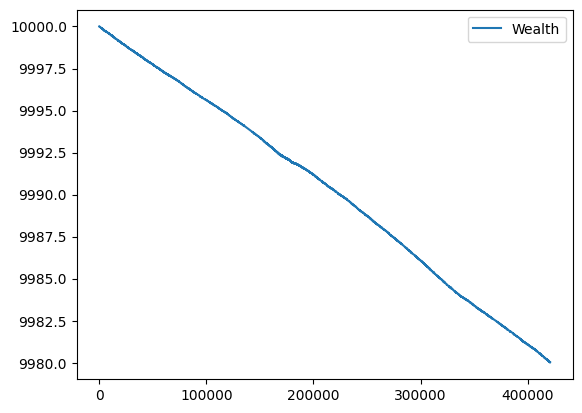

In [7]:
df[["Wealth"]].plot()

In [5]:
df["Wealth"].dropna()

100         0.000000
101         0.000000
102         0.000000
103         0.000000
104         0.000000
             ...    
1613523   -83.718158
1613524   -83.718118
1613525   -83.717920
1613526   -83.717966
1613527   -83.718009
Name: Wealth, Length: 1613428, dtype: float64

In [25]:
0.00007*30_000

2.0999999999999996

In [26]:
9997.900000*(1-0.000027) * 3 * (-1)

-29992.8901701

In [31]:
(1-0.000027*-3) * 9997.900000

9998.709829899999

In [ ]:
9997.900000* (1+ () )

In [33]:
0.000027*3

8.099999999999999e-05

In [32]:
df_["Wealth_change"] = df_["Wealth"].pct_change()
df_.head(20)

,timestamp,GBP_USD,EUR_USD,hedge_ratio,intercept,y_hat,residuals,resid_mean,resid_std,z_score,signal,position,position_change,EUR_USD_return,GBP_USD_return,Portfolio_return,Wealth,fees,Wealth_change
199,2019-07-19 14:51:00+00:00,1.25066,1.12248,0.470201,0.534090,1.122151,0.000329,0.000191,0.000138,0.999992,-1,0.0,0.0,-0.000018,0.000032,-0.000000,10000.000000,0.00000,NaN
200,2019-07-19 14:52:00+00:00,1.25066,1.12251,0.458694,0.548502,1.122173,0.000337,0.000193,0.000138,1.040565,-1,-1.0,1.0,0.000027,0.000000,-0.000027,9997.900000,0.00021,-0.000210
201,2019-07-19 14:53:00+00:00,1.25086,1.12262,0.447520,0.562499,1.122284,0.000336,0.000194,0.000139,1.019468,-1,-1.0,0.0,0.000098,0.000160,-0.000026,9999.198204,0.00000,0.000130
202,2019-07-19 14:54:00+00:00,1.25108,1.12276,0.438795,0.573428,1.122396,0.000364,0.000196,0.000140,1.200251,-1,-1.0,0.0,0.000125,0.000176,-0.000048,9998.405390,0.00000,-0.000079
203,2019-07-19 14:55:00+00:00,1.25060,1.12266,0.430755,0.583500,1.122202,0.000458,0.000201,0.000141,1.822344,-1,-1.0,0.0,-0.000089,-0.000384,-0.000076,9996.979613,0.00000,-0.000143
204,2019-07-19 14:56:00+00:00,1.25036,1.12250,0.415998,0.601985,1.122132,0.000368,0.000203,0.000142,1.162345,-1,-1.0,0.0,-0.000143,-0.000192,0.000063,9994.694281,0.00000,-0.000229
205,2019-07-19 14:57:00+00:00,1.24996,1.12224,0.404039,0.616964,1.121996,0.000244,0.000205,0.000142,0.276530,0,-1.0,0.0,-0.000232,-0.000320,0.000102,9996.573847,0.00000,0.000188
206,2019-07-19 14:58:00+00:00,1.25020,1.12210,0.394459,0.628963,1.122116,-0.000016,0.000202,0.000143,-1.518871,1,0.0,1.0,-0.000125,0.000192,-0.000000,9997.543986,0.00021,0.000097
207,2019-07-19 14:59:00+00:00,1.25022,1.12218,0.394181,0.629312,1.122125,0.000055,0.000200,0.000144,-1.008425,1,1.0,1.0,0.000071,0.000016,0.000065,9997.543986,0.00021,0.000000
208,2019-07-19 15:00:00+00:00,1.25068,1.12232,0.392363,0.631590,1.122310,0.000010,0.000198,0.000145,-1.295967,1,1.0,0.0,0.000125,0.000368,-0.000020,10001.593512,0.00000,0.000405


In [4]:
df = pd.read_csv('/root/QuantAndCo/Data/Backtest/Optimization/Pairs_trading_EUR_USD_optimization_20222024_3.csv')

In [5]:
df

,Combination #,start_date,end_date,window,long_thres,short_thres,leverage,performance
0,1,2023-10-09,2023-11-28,1000,-2.0,0.5,1,0.021853
1,1,2023-04-25,2023-06-14,1000,-2.0,0.5,1,0.012568
2,1,2020-12-15,2021-02-07,1000,-2.0,0.5,1,0.022476
3,1,2020-06-03,2020-07-24,1000,-2.0,0.5,1,-0.002547
4,1,2023-09-21,2023-11-10,1000,-2.0,0.5,1,0.041155
...,...,...,...,...,...,...,...,...
6395,64,2022-06-09,2022-07-28,50000,-0.5,2.0,1,0.008307
6396,64,2023-03-19,2023-05-08,50000,-0.5,2.0,1,0.009083
6397,64,2021-09-17,2021-11-12,50000,-0.5,2.0,1,-0.001096
6398,64,2023-01-04,2023-02-22,50000,-0.5,2.0,1,0.000775


In [14]:
df.window.unique()

array([ 10000,  50000, 100000, 200000, 500000])

In [ ]:
df.lo

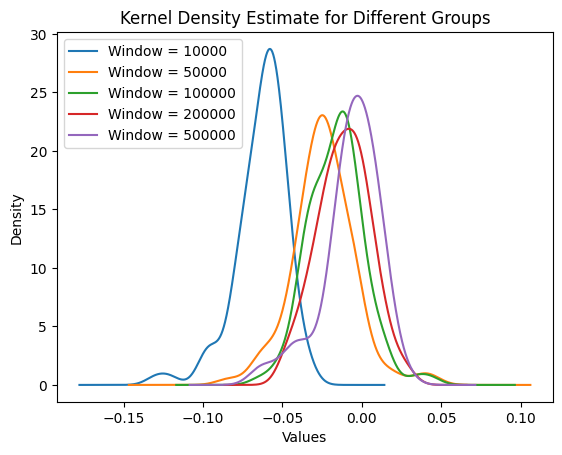

In [15]:
import matplotlib.pyplot as plt

long = 0
short = 0
for window in df.window.unique():
    try:
        subset = df[(df['long_thres'] == long) & (df['short_thres'] == short) & (df['window'] == window)]  # Filter data for each group
        subset['performance'].plot.kde(label=f'Window = {window}')
    except:
        continue

plt.title('Kernel Density Estimate for Different Groups')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: ylabel='Density'>

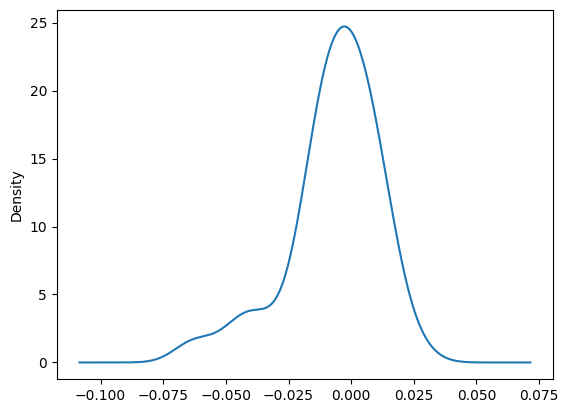

In [26]:
df.loc[(df.window==500_000) & (df.long_thres==0) & (df.short_thres==0)]['performance'].plot.kde()

In [19]:
df.long_thres.unique()

array([-2. , -1.5, -1. , -0.5,  0. ])

In [20]:
df.short_thres.unique()

array([0. , 0.5, 1. , 1.5, 2. ])

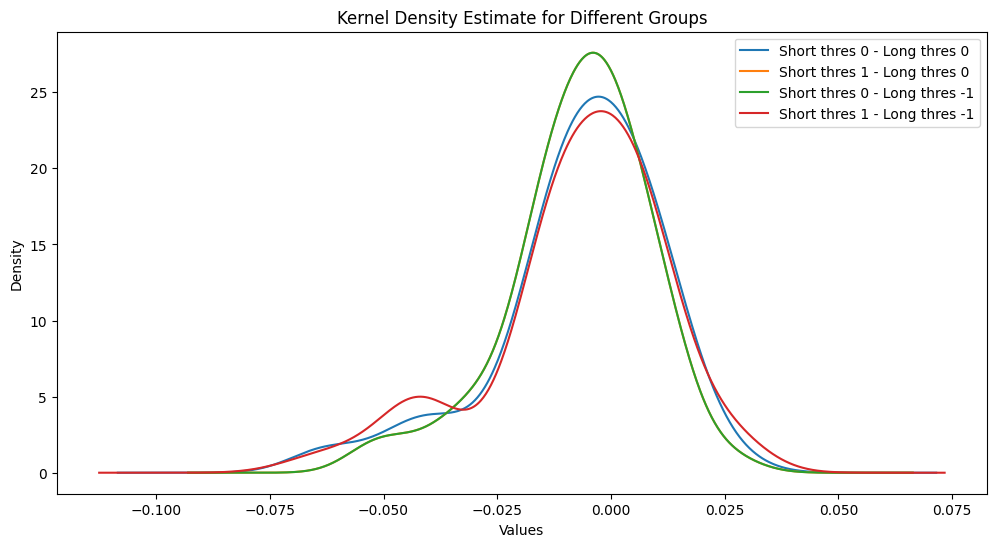

In [29]:
import matplotlib.pyplot as plt

# List unique groups
long_ = [0, -1]
short_ = [0, 1]

window = 500_000

# Plotting KDE for each group
for long in long_:
    for short in short_:
        try:
            subset = df[(df['long_thres'] == long) & (df['short_thres'] == short) & (df['window'] == window)]  # Filter data for each group
            subset['performance'].plot.kde(label=f'Short thres {short} - Long thres {long}', figsize=(12,6))
        except:
            print(f'No KDE for {short} and {long}')
            continue

plt.title('Kernel Density Estimate for Different Groups')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

In [4]:
df.sort_values(by='performance', ascending=False)

#perf
#dd
#temps avant d'atteindre le drawdown

,Combination #,start_date,end_date,long_thres,short_thres,leverage,performance,loss
1782,17,2022-08-24,2022-10-12,-1.503249,0.974934,1,0.065774,-0.065774
9082,90,2022-08-24,2022-10-12,-1.468462,1.030341,1,0.065721,-0.065721
5482,54,2022-08-24,2022-10-12,-1.494258,2.367196,1,0.064802,-0.064802
682,6,2022-08-24,2022-10-12,-1.466285,2.461851,1,0.064111,-0.064111
8682,86,2022-08-24,2022-10-12,-1.545287,1.426522,1,0.063014,-0.063014
...,...,...,...,...,...,...,...,...
8069,80,2022-06-06,2022-07-25,-0.846063,1.783001,1,-0.026058,0.026058
3469,34,2022-06-06,2022-07-25,-0.396860,0.299921,1,-0.026058,0.026058
9969,99,2022-06-06,2022-07-25,-0.280739,1.675043,1,-0.026058,0.026058
3669,36,2022-06-06,2022-07-25,-0.787772,0.543271,1,-0.026058,0.026058


In [1]:
import numpy as np

def calculate_tick_rule(price_change):
    """
    Implements the tick rule to classify a trade as a buy (+1) or sell (-1)
    based on the price change.
    """
    if price_change == 0:
        return np.sign(price_change)
    else:
        return np.sign(price_change)

def compute_tib(prices, volumes, exp_weighted_span=30):
    """
    Computes Tick Imbalance Bars (TIBs) for a given sequence of prices and volumes.
    
    Args:
        prices (list or np.array): A sequence of trade prices.
        volumes (list or np.array): A sequence of trade volumes corresponding to the prices.
        exp_weighted_span (int): The span for computing exponentially weighted moving averages.
        
    Returns:
        list: A list of tuples, where each tuple contains the start and end indices of a TIB.
    """
    
    # Calculate price changes and apply the tick rule
    price_changes = np.diff(prices)
    tick_rules = [calculate_tick_rule(pc) for pc in price_changes]
    tick_rules.insert(0, tick_rules[-1])  # Set boundary condition for b0
    
    # Compute the tick imbalance at each step
    tick_imbalance = np.cumsum(tick_rules)
    
    # Estimate the expected size of the tick bar and the probability of a buy
    exp_T = np.exp_mov_avg(tick_imbalance, span=exp_weighted_span)
    prob_buy = np.exp_mov_avg(np.array(tick_rules) == 1, span=exp_weighted_span)
    
    # Compute the expected tick imbalance
    exp_tick_imbalance = exp_T * (2 * prob_buy - 1)
    
    # Find the indices where the tick imbalance exceeds the expected threshold
    imbalance_threshold = np.abs(2 * prob_buy - 1)
    exceeding_indices = np.flatnonzero(np.abs(tick_imbalance) >= exp_tick_imbalance * imbalance_threshold)
    
    # Construct the TIBs
    tibs = []
    start_idx = 0
    for end_idx in exceeding_indices:
        tibs.append((start_idx, end_idx))
        start_idx = end_idx
    
    return tibs

In [2]:
prices = [10, 11, 12, 11, 10, 9, 10, 11]
volumes = [100, 200, 300, 150, 100, 200, 150, 250]
tibs = compute_tib(prices, volumes)
print(tibs)

AttributeError: module 'numpy' has no attribute 'exp_mov_avg'

In [3]:
import numpy as np
import pandas as pd

def calculate_tick_rule(price_change):
    """
    Implements the tick rule to classify a trade as a buy (+1) or sell (-1)
    based on the price change.
    """
    if price_change == 0:
        return np.sign(price_change)
    else:
        return np.sign(price_change)

def compute_tib(prices, volumes, exp_weighted_span=30):
    """
    Computes Tick Imbalance Bars (TIBs) for a given sequence of prices and volumes.
    
    Args:
        prices (list or np.array): A sequence of trade prices.
        volumes (list or np.array): A sequence of trade volumes corresponding to the prices.
        exp_weighted_span (int): The span for computing exponentially weighted moving averages.
        
    Returns:
        list: A list of tuples, where each tuple contains the start and end indices of a TIB.
    """
    
    # Calculate price changes and apply the tick rule
    price_changes = np.diff(prices)
    tick_rules = [calculate_tick_rule(pc) for pc in price_changes]
    tick_rules.insert(0, tick_rules[-1])  # Set boundary condition for b0
    
    # Convert to pandas Series for convenience
    tick_rules_series = pd.Series(tick_rules)
    
    # Compute the tick imbalance at each step
    tick_imbalance = tick_rules_series.cumsum()
    
    # Estimate the expected size of the tick bar and the probability of a buy
    exp_T = tick_imbalance.ewm(span=exp_weighted_span).mean()
    prob_buy = (tick_rules_series == 1).ewm(span=exp_weighted_span).mean()
    
    # Compute the expected tick imbalance
    exp_tick_imbalance = exp_T * (2 * prob_buy - 1)
    
    # Find the indices where the tick imbalance exceeds the expected threshold
    imbalance_threshold = np.abs(2 * prob_buy - 1)
    exceeding_indices = tick_imbalance.index[np.abs(tick_imbalance) >= exp_tick_imbalance * imbalance_threshold]
    
    # Construct the TIBs
    tibs = []
    start_idx = 0
    for end_idx in exceeding_indices:
        tibs.append((start_idx, end_idx))
        start_idx = end_idx
    
    return tibs

In [4]:
prices = [10, 11, 12, 11, 10, 9, 10, 11]
volumes = [100, 200, 300, 150, 100, 200, 150, 250]
tibs = compute_tib(prices, volumes)
print(tibs)

[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]


In [ ]:
volumes